In [4]:
import pandas as pd
import numpy as np

# Read n rows from the embedded data
df = pd.read_csv('../data/vec_avg_token_data.csv',nrows=1000, skiprows = 1)
label_vectors = pd.read_csv('../data/synonym_label_token_embeddings.csv')

X = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [5]:
from sklearn.metrics.pairwise import cosine_similarity as cs
from sklearn.metrics import accuracy_score as acc_score

pred = np.argmax(cs(X, label_vectors), axis = 1)
print(acc_score(y,pred))

0.59


In [6]:
from kmeans_predictions import kmeans_pred

print("Accuracy with kmeans clustering")
kmeans_labels = kmeans_pred(X,y, label_vectors, len(label_vectors));

Accuracy with kmeans clustering
0.809


C:\Users\adamv\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1148: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


In [7]:
from sklearn.manifold import TSNE

# Use T-sne to get the data from 128 to 2 dimensions
data = np.append(X, label_vectors, axis=0)
data_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(data)
X_embedded = data_embedded[:-4,:]
labels_embedded = data_embedded[-4:,:]

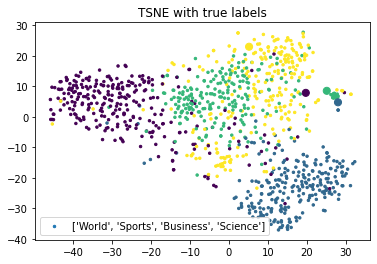

In [13]:
import matplotlib.pyplot as plt
labels = ["World","Sports","Business","Science"]

# Plot 2 dimensional data
plt.scatter(X_embedded[:,0], X_embedded[:,1], c = y, s = 6, label = labels)
plt.scatter(labels_embedded[:,0], labels_embedded[:,1], c= list(range(len(labels))), s = 50)
plt.title("TSNE with true labels")
plt.legend();

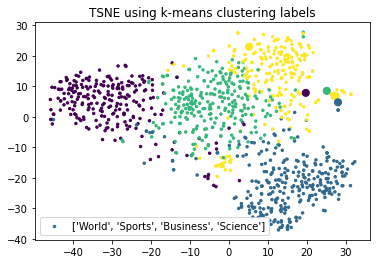

In [14]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], c = kmeans_labels, s = 6, label = labels)
plt.scatter(labels_embedded[:,0], labels_embedded[:,1], c= list(range(len(labels))), s = 50)
plt.title("TSNE using k-means clustering labels")
plt.legend();